# **Pre-processing and Cleaning**

Here are several points of discussion
- How to deal with missing values? What imputation method to use and why?
- When to use normalization and standardization? What's the difference between the two?
- How do you define an outlier?
- How to deal with outliers?
- What is multi-collinearity? How to detect it? How to deal with it?


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dirty dataset
df = pd.read_csv('./nyc-taxi-trip-duration/train_dirty.csv')
df.shape

(1690302, 19)

`np.nan`

# **Dealing with Missing Values**

Missing values are a common occurrence in datasets. There are several ways to deal with missing values. The most common ones are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, or any other statistical measure

In [3]:
# How many rows have missing values?
df.isnull().sum()

id                       120455
vendor_id                120433
pickup_datetime          120604
dropoff_datetime         120354
passenger_count          120122
pickup_longitude         120312
pickup_latitude          120838
dropoff_longitude        120855
dropoff_latitude         120479
store_and_fwd_flag       120313
trip_duration            120579
nyc_borough              565691
taxi_type                408766
payment_type             706406
distance                 192685
speed                    200657
trip_distance_miles      192685
trip_duration_minutes    120579
LC_sim                   200657
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690302 entries, 0 to 1690301
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1569847 non-null  object 
 1   vendor_id              1569869 non-null  float64
 2   pickup_datetime        1569698 non-null  object 
 3   dropoff_datetime       1569948 non-null  object 
 4   passenger_count        1570180 non-null  float64
 5   pickup_longitude       1569990 non-null  float64
 6   pickup_latitude        1569464 non-null  float64
 7   dropoff_longitude      1569447 non-null  float64
 8   dropoff_latitude       1569823 non-null  float64
 9   store_and_fwd_flag     1569989 non-null  object 
 10  trip_duration          1569723 non-null  float64
 11  nyc_borough            1124611 non-null  object 
 12  taxi_type              1281536 non-null  object 
 13  payment_type           983896 non-null   object 
 14  distance          

## **Drop Records with Missing Values**

In [6]:
# Drop rows with missing values
df_no_missing = df.dropna()
df.shape, df_no_missing.shape

((1690302, 19), (431462, 19))

Removing rows with missing values **may** result to a **downsize** in dataset size. To evaluate whether this is a good idea, we need to check the percentage of rows that will eventually get dropped. If the percentage is small, then it is safe to remove the rows with missing values. 

Alternatively, even if the percentage is small if the **overall dataset size** to begin with is already small, then it is not a good idea to remove rows with missing values. In this case, we need to impute the missing values.

In [7]:
# How much was removed
num_dropped = df.shape[0] - df_no_missing.shape[0]
print(f'{num_dropped} rows were removed which is {num_dropped / df.shape[0] * 100:.2f}% of the dataset')

1258840 rows were removed which is 74.47% of the dataset


## **Impute Missing Values**

Almost a 3/4 of the dataset will end up getting dropped if we remove rows with missing values. This is a significant amount of data. Hence, we will impute the missing values.

There are several ways to impute missing values. The most common ones are:
- Impute with mean, median, or mode
- Impute with a constant value that can be identified by the user based on the context of the problem
- Impute with a value estimated by another predictive model

In [8]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'nyc_borough', 'taxi_type', 'payment_type', 'distance',
       'speed', 'trip_distance_miles', 'trip_duration_minutes', 'LC_sim'],
      dtype='object')

In [9]:
# Remove unwanted columns
unwanted = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

df_selected = df[[col for col in df.columns if col not in unwanted]]
df_selected.shape

(1690302, 11)

In [10]:
df_selected.sample(3)

,passenger_count,store_and_fwd_flag,trip_duration,nyc_borough,taxi_type,payment_type,distance,speed,trip_distance_miles,trip_duration_minutes,LC_sim
683119,1.0,N,729.0,NaN,NaN,NaN,2.354618,11.627743,1.463091,12.150000,32.931591
24624,1.0,N,270.0,Manhattan,fhv,NaN,1.248816,16.650884,0.775978,4.500000,12.430978
700421,1.0,N,586.0,NaN,yellow,dispute,1.096795,6.737987,0.681516,9.766667,25.977183


In [11]:
df_selected.isnull().sum()

passenger_count          120122
store_and_fwd_flag       120313
trip_duration            120579
nyc_borough              565691
taxi_type                408766
payment_type             706406
distance                 192685
speed                    200657
trip_distance_miles      192685
trip_duration_minutes    120579
LC_sim                   200657
dtype: int64

In [13]:
# Impute the following columns using the MEAN
impute_with_mean = ['passenger_count', 'trip_duration', 'LC_sim']

# Impute the following with MODE
impute_with_mode = ['store_and_fwd_flag', 'nyc_borough', 'taxi_type', 'payment_type']

# Impute with MEDIAN
impute_with_median = ['distance']

# Impute with specific value or calculation: speed, trip_distance_miles, trip_duration_minutes

In [14]:
df_selected[impute_with_mean] = df_selected[impute_with_mean].fillna(df_selected[impute_with_mean].mean())
df_selected[impute_with_mode] = df_selected[impute_with_mode].fillna(df_selected[impute_with_mode].mode().iloc[0])
df_selected[impute_with_median] = df_selected[impute_with_median].fillna(df_selected[impute_with_median].median())

df_selected['speed'] = df_selected['distance'] / df_selected['trip_duration'] * 3600
df_selected['trip_distance_miles'] = df_selected['distance'] * 0.621371
df_selected['trip_duration_minutes'] = df_selected['trip_duration'] / 60

/var/folders/3k/8x521n3x1hv89v96qvzcfzb00000gn/T/ipykernel_18023/1497166331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[impute_with_mean] = df_selected[impute_with_mean].fillna(df_selected[impute_with_mean].mean())
/var/folders/3k/8x521n3x1hv89v96qvzcfzb00000gn/T/ipykernel_18023/1497166331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[impute_with_mode] = df_selected[impute_with_mode].fillna(df_selected[impute_with_mode].mode().iloc[0])
/var/folders/3k/8x521n3x1hv89v96qv

In [15]:
# Re-check for missing values
df_selected.isnull().sum()

passenger_count          0
store_and_fwd_flag       0
trip_duration            0
nyc_borough              0
taxi_type                0
payment_type             0
distance                 0
speed                    0
trip_distance_miles      0
trip_duration_minutes    0
LC_sim                   0
dtype: int64

## **Drop Columns with Missing Values and Impute the Rest**

Instead of dropping an entire records simply because it has missing values, you can instead choose to drop only specific columns with missing values. This is a good idea if the columns with missing values are not important to the analysis.

> But, what do you think is the disadvantage of this approach?

In [16]:
# Calculate percentage of missing values for each column
df.isnull().sum() / df.shape[0] * 100

id                        7.126241
vendor_id                 7.124940
pickup_datetime           7.135056
dropoff_datetime          7.120266
passenger_count           7.106541
pickup_longitude          7.117781
pickup_latitude           7.148900
dropoff_longitude         7.149906
dropoff_latitude          7.127661
store_and_fwd_flag        7.117840
trip_duration             7.133577
nyc_borough              33.466860
taxi_type                24.183016
payment_type             41.791703
distance                 11.399442
speed                    11.871074
trip_distance_miles      11.399442
trip_duration_minutes     7.133577
LC_sim                   11.871074
dtype: float64

You can use this as the basis for deciding whether a **column** or **feature** is even worth including in the analysis. If a column has a lot of missing values, then it is probably not worth including in the analysis.

## **Other Implementations**

Our imputation simply used of `pandas` `fillna()` method. There are other implementations that you can use. For example, you can use `sklearn`'s `SimpleImputer` class. You can also use `fancyimpute`'s `IterativeImputer` class. Refer to the documentation for the differences between the available methods from `sklearn`:

- https://scikit-learn.org/stable/modules/impute.html
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute

More information about `fancyimpute` can be found here: https://pypi.org/project/fancyimpute/

On top of these, *fancier* or *more sophisticated* implementations of imputation can
- include use of other machine learning models to estimate the missing values instead (predictive imputation)
- be imputation using multiple imputation by chained equations (MICE) - `IterativeImputer` of `sklearn` is an implementation of this
- be found in the `impyute` package: https://pypi.org/project/impyute/
- consider **other algorithms altogether** that **can handle missing values implicitly** such as **decision trees** and **random forests** (or better yet, **XGBoost**)

In [17]:
df.dtypes

id                        object
vendor_id                float64
pickup_datetime           object
dropoff_datetime          object
passenger_count          float64
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
store_and_fwd_flag        object
trip_duration            float64
nyc_borough               object
taxi_type                 object
payment_type              object
distance                 float64
speed                    float64
trip_distance_miles      float64
trip_duration_minutes    float64
LC_sim                   float64
dtype: object

# **Dealing with Different Scales**

**Normalization**:
- Scales the values between 0 and 1
- Useful when the distribution of the data does not follow a Gaussian distribution
- Useful when the data is bounded

**Standardization**:
- Scales the values to have a mean of 0 and standard deviation of 1
- Useful when the distribution of the data follows a Gaussian distribution
- Useful when the data is unbounded

Using `sklearn`'s `StandardScaler` and `MinMaxScaler` classes, we can easily normalize and standardize the data. Refer to the documentation for more information:

- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

## **Normalization**

In [19]:
df[['passenger_count', 'distance']].describe()

,passenger_count,distance
count,1.570180e+06,1.497617e+06
mean,1.121235e+01,3.440064e+00
std,3.720397e+02,4.287283e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.231656e+00
50%,1.000000e+00,2.092911e+00
75%,2.000000e+00,3.873260e+00
max,3.252600e+04,1.240909e+03


In [20]:
normalize_cols = ['passenger_count', 'distance']
df[normalize_cols].head()

,passenger_count,distance
0,1.0,1.382570
1,1.0,11.930198
2,1.0,1.763881
3,1.0,20.444311
4,1.0,1.485692


In [21]:
df[normalize_cols].describe()

,passenger_count,distance
count,1.570180e+06,1.497617e+06
mean,1.121235e+01,3.440064e+00
std,3.720397e+02,4.287283e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.231656e+00
50%,1.000000e+00,2.092911e+00
75%,2.000000e+00,3.873260e+00
max,3.252600e+04,1.240909e+03


In [22]:
# Normalize the following columns: passenger_count, trip_duration, distance, speed, trip_distance_miles, trip_duration_minutes
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[normalize_cols] = scaler.fit_transform(df[normalize_cols])
df[normalize_cols].head()

,passenger_count,distance
0,0.000031,0.001114
1,0.000031,0.009614
2,0.000031,0.001421
3,0.000031,0.016475
4,0.000031,0.001197


In [23]:
df[normalize_cols].describe()

,passenger_count,distance
count,1.570180e+06,1.497617e+06
mean,3.447195e-04,2.772214e-03
std,1.143822e-02,3.454955e-03
min,0.000000e+00,0.000000e+00
25%,3.074464e-05,9.925436e-04
50%,3.074464e-05,1.686596e-03
75%,6.148927e-05,3.121309e-03
max,1.000000e+00,1.000000e+00


## **Standardization**

In [24]:
standardize_cols = ['trip_duration', 'distance', 'trip_distance_miles', 'trip_duration_minutes']

In [25]:
df[standardize_cols].describe()

,trip_duration,distance,trip_distance_miles,trip_duration_minutes
count,1.569723e+06,1.497617e+06,1.497617e+06,1.569723e+06
mean,5.823368e+03,2.772214e-03,2.137556e+00,9.705613e+01
std,4.270312e+05,3.454955e-03,2.663994e+00,7.117187e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.666667e-02
25%,3.970000e+02,9.925436e-04,7.653153e-01,6.616667e+00
50%,6.630000e+02,1.686596e-03,1.300474e+00,1.105000e+01
75%,1.077000e+03,3.121309e-03,2.406731e+00,1.795000e+01
max,4.274672e+08,1.000000e+00,7.710647e+02,7.124452e+06


In [26]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])
# df[standardize_cols].head()

In [27]:
df[standardize_cols].describe()

,trip_duration,distance,trip_distance_miles,trip_duration_minutes
count,1.569723e+06,1.497617e+06,1.497617e+06,1.569723e+06
mean,3.168584e-19,-1.177203e-16,-5.725649e-17,4.854723e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.363453e-02,-8.023881e-01,-8.023881e-01,-1.363453e-02
25%,-1.270720e-02,-5.151068e-01,-5.151068e-01,-1.270720e-02
50%,-1.208429e-02,-3.142207e-01,-3.142207e-01,-1.208429e-02
75%,-1.111481e-02,1.010421e-01,1.010421e-01,-1.111481e-02
max,1.001008e+03,2.886371e+02,2.886371e+02,1.001008e+03


# **Dealing with Outliers**

Outliers may be due to:
- Measurement error
- Data entry error
- True outlier observation

These can affect the performance of the model. However, the extent of how they skew the model's performance depends on the algorithm used. For example, linear regression is very sensitive to outliers while decision trees are not. As such, you can either
- detect and or remove outliers, or
- use an algorithm that is not sensitive to outliers

In [ ]:
# Detecting outlier with z-score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

If the Z-score of a data point is more than a threshold (commonly 3), it is considered an outlier. 

In [9]:
# Detecting outlier with IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

vendor_id                  1.000000
passenger_count            1.000000
pickup_longitude           0.024544
pickup_latitude            0.030991
dropoff_longitude          0.028313
dropoff_latitude           0.033924
trip_duration            680.000000
distance                   2.641604
speed                      8.729247
trip_distance_miles        1.641416
trip_duration_minutes     11.333333
LC_sim                    30.999991
dtype: float64

In [10]:
# Check how many outliers are there per column based on the IQR
# Note, not all of the original columns from df.columns CAN HAVE IQRs calculated. Why?
for col in IQR.index:
    print(f'Number of outliers in {col}: {df[(df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))].shape[0]}')

Number of outliers in vendor_id: 0
Number of outliers in passenger_count: 168097
Number of outliers in pickup_longitude: 90755
Number of outliers in pickup_latitude: 56833
Number of outliers in dropoff_longitude: 84023
Number of outliers in dropoff_latitude: 77492
Number of outliers in trip_duration: 80957
Number of outliers in distance: 144491
Number of outliers in speed: 60921
Number of outliers in trip_distance_miles: 144491
Number of outliers in trip_duration_minutes: 80957
Number of outliers in LC_sim: 79943


A *sophisticated* method for detecting outliers is using **Isolation Forest**. You can read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html. The point of the algorithm is to **detect anomalies** such as outliers.

In [14]:
# Detecting outliers with Isolation Forest
num_cols = ['passenger_count', 'trip_duration', 'distance']
df_anomalies = df[num_cols]

# Remove np.nan as Isolation Forest cannot handle missing values
df_anomalies = df_anomalies.dropna()

from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(df_anomalies)

# Predict if a row is an outlier or not; 1 = not outlier, -1 = outlier
df_anomalies['outlier'] = clf.predict(df_anomalies)
print(f"Anomalies:\n\n{df_anomalies['outlier'].value_counts()}")

df_anomalies.sample(10)

Anomalies:

 1    1165485
-1     318594
Name: outlier, dtype: int64


,passenger_count,trip_duration,distance,outlier
790909,1.0,605.0,2.898418,1
378503,1.0,1054.0,1.406718,1
1680655,1.0,1650.0,9.640574,-1
1171591,1.0,1081.0,2.742455,1
872909,3.0,461.0,3.171626,1
796344,1.0,208.0,0.685209,1
1642429,1.0,498.0,1.772435,1
1452421,1.0,1796.0,10.337275,-1
895903,2.0,1582.0,4.698720,1
1010117,1.0,1005.0,8.303200,1


Another algorithm that can be used to detect outliers is **Local Outlier Factor**. You can read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html.

In [15]:
# Detect outliers with Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df_anomalies['outlier'] = clf.fit_predict(df_anomalies)
print(f"Anomalies:\n\n{df_anomalies['outlier'].value_counts()}")

Anomalies:

 1    1335671
-1     148408
Name: outlier, dtype: int64


# **Dealing with Multi-Collinearity**

In order to detect whether your dataset has multi-collinearity, you can use the **Variance Inflation Factor (VIF)**. The VIF measures how much the variance of the estimated regression coefficients are inflated as compared to when the features are not correlated with each other. The higher the VIF, the higher the correlation of the feature with the other features.

The VIF is computed as follows:

$$VIF = \frac{1}{1 - R^2}$$

where $R^2$ is the coefficient of determination of the regression of the feature on the remaining features.

In [16]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'nyc_borough', 'taxi_type', 'payment_type', 'distance',
       'speed', 'trip_distance_miles', 'trip_duration_minutes', 'LC_sim'],
      dtype='object')

In [17]:
numerical_cols = ['passenger_count', 'trip_duration', 'distance', 'speed', 'trip_distance_miles', 'trip_duration_minutes', 'LC_sim']

<Axes: >

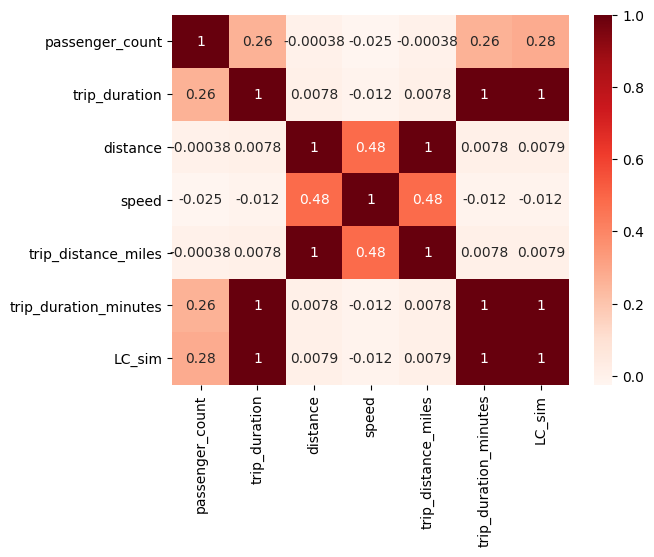

In [19]:
# Correlation Matrix
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix with seaborn. Use red hues to indicate multi-collinearity (i.e. high correlation)
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='Reds')

Variance Inflation Factor (VIF) is a measure of how much the variance of the estimated regression coefficient is increased due to multicollinearity. VIF of 1 indicates two variables are not correlated, between 1 and 5 indicates moderate correlation, and above 5 indicates high correlation. You can read more about it here: https://en.wikipedia.org/wiki/Variance_inflation_factor, and it's implementation in `statsmodels` here: https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html.

/var/folders/3k/8x521n3x1hv89v96qvzcfzb00000gn/T/ipykernel_5702/1796412871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.dropna(inplace=True) # Remove np.nan as VIF cannot handle missing values
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


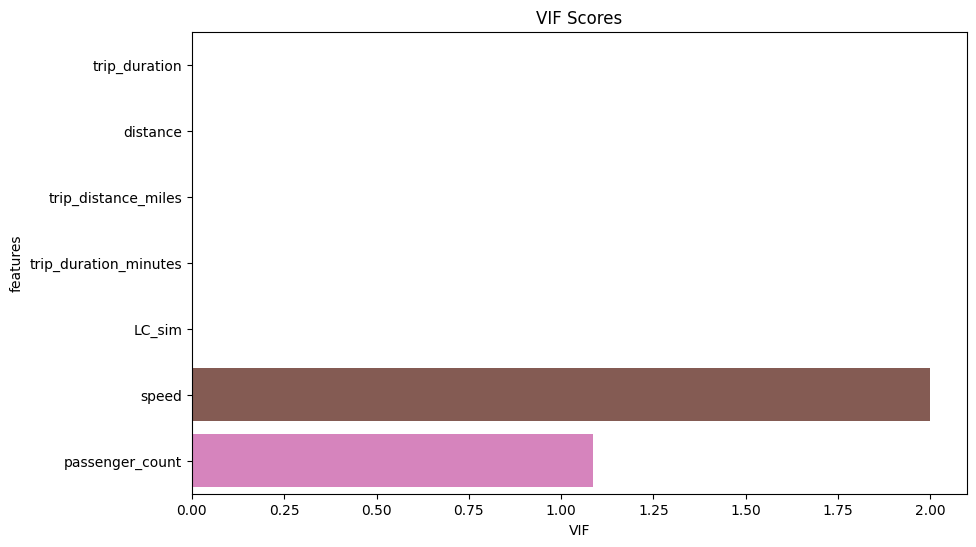

In [24]:
# Using Variance Inflation Factor (VIF) to detect multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Data
df_data = df[numerical_cols]
df_data.dropna(inplace=True) # Remove np.nan as VIF cannot handle missing values

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['features'] = df_data.columns
vif['VIF'] = [variance_inflation_factor(df_data.values, i) for i in range(df_data.shape[1])]

# Plot the VIF
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='features', data=vif.sort_values('VIF', ascending=False))
plt.title('VIF Scores')
plt.show()

In [25]:
vif

,features,VIF
0,passenger_count,1.08691
1,trip_duration,inf
2,distance,inf
3,speed,1.99916
4,trip_distance_miles,inf
5,trip_duration_minutes,inf
6,LC_sim,inf


# **Dealing with Categorical Variables**

Since machine learning models are based on mathematical equations, categorical variables need to be converted to numerical values. There are several ways to do this:
- **Label encoding**
- **One-hot encoding**
- Ordinal encoding
- Binary encoding
- Hash encoding
- Target encoding

The `sklearn` library is rich with these different types of encoders. Refer to the documentation for more information: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing.

In [28]:
df.dtypes

id                        object
vendor_id                float64
pickup_datetime           object
dropoff_datetime          object
passenger_count          float64
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
store_and_fwd_flag        object
trip_duration            float64
nyc_borough               object
taxi_type                 object
payment_type              object
distance                 float64
speed                    float64
trip_distance_miles      float64
trip_duration_minutes    float64
LC_sim                   float64
dtype: object

tall = 0
grande = 1
venti = 2

In [29]:
df['store_and_fwd_flag'].unique()

array(['N', nan, 'Y'], dtype=object)

In [30]:
df['taxi_type'].unique()

array([nan, 'yellow', 'fhv', 'green'], dtype=object)